In [18]:
import numpy as np
import pandas as pd
import  scipy
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [19]:
# read in data
df = pd.read_csv('../data-201-resources-master/ESS_practice_data/ESSdata_thinkful.csv').dropna()
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [24]:
# define data and target
X = df.drop(['cntry', 'idno', 'partner'], axis=1)
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)
Y = df['partner'] - 1

In [25]:
# breaking into training & test sets
trainingSize = int(df.shape[0] * 0.9)
X_train = X[:trainingSize]
Y_train = Y[:trainingSize]
X_test = X[trainingSize:]
Y_test = Y[trainingSize:]

In [26]:
# Now use GladientBoosting
params = {'n_estimators': 800,
          'max_depth': 4,
          'loss': 'deviance'}
# the model
gbc = ensemble.GradientBoostingClassifier(**params)
gbc.fit(X_train, Y_train)

predict_train = gbc.predict(X_train)
predict_test = gbc.predict(X_test)

# accuracy table
table_train = pd.crosstab(Y_train, predict_train, margins=True)
table_test = pd.crosstab(Y_test, predict_test, margins=True)
train_tI_errors = table_train.loc[0.0, 1.0] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1.0, 0.0] / table_train.loc['All', 'All']
test_tI_errors = table_test.loc[0.0, 1.0] / table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0, 0.0] / table_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.01282051282051282
Percent Type II errors: 0.09247135842880523

Test set accuracy:
Percent Type I errors: 0.09570552147239264
Percent Type II errors: 0.18036809815950922


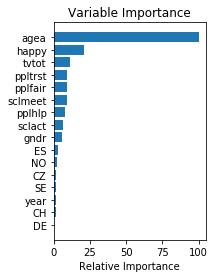

In [27]:
feature_importance = gbc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()